# 프로젝트명 : 4주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 다이캐스팅은 액체화된 금속을 주조(틀, Frame)에 넣고 원하는 모양의 금속부품을 생산하는 방법입니다.
- 다이캐스팅에서는 주요 4대 요소인 압력, 속도, 시간, 온도에 대해서 조건관리를 중요 시 합니다.

### 📝 현장에서 온 정보
- 데이터 제공기업의 경우 일일 또는 주간 단위로 품질 이슈 현황을 파악하고 있으며 불량원인을 수작업으로 분석하고 있습니다.
- 각 불량에 대한 발생원인과 대책이 정의되어 있으나 이를 적용하여 해결하지 못하고 있는 실정입니다.
- 대부분의 중소기업에서는 관리자 및 작업자의 경험에 의해 설비를 운용하고 있어 체계적인 관리를 하지 못하고 있기 때문입니다.
- 따라서 일정한 공정 환경 및 공정 변수를 관리해 불량에 대응하는 것이 필요합니다.


#### 다이캐스팅

![다이캐스팅](https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/%E1%84%83%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%8F%E1%85%A2%E1%84%89%E1%85%B3%E1%84%90%E1%85%B5%E1%86%BC.gif?alt=media&token=70587460-34c3-4a67-a056-f7a5e6ad8521)

In [46]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import warnings
warnings.filterwarnings('ignore')

casting = pd.read_csv("https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/casting.csv?alt=media&token=54fffc33-03ad-4431-8e20-34ede32c043f", 
                      encoding='cp949',
                      index_col=0)

In [47]:
casting.head()

,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


## 예제코드 따라치기

In [48]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import xgboost
import lightgbm
import warnings
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
warnings.filterwarnings('ignore')

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (c:\Users\USER\projects\2week\venv\lib\site-packages\sklearn\utils\metaestimators.py)

In [ ]:
data = casting

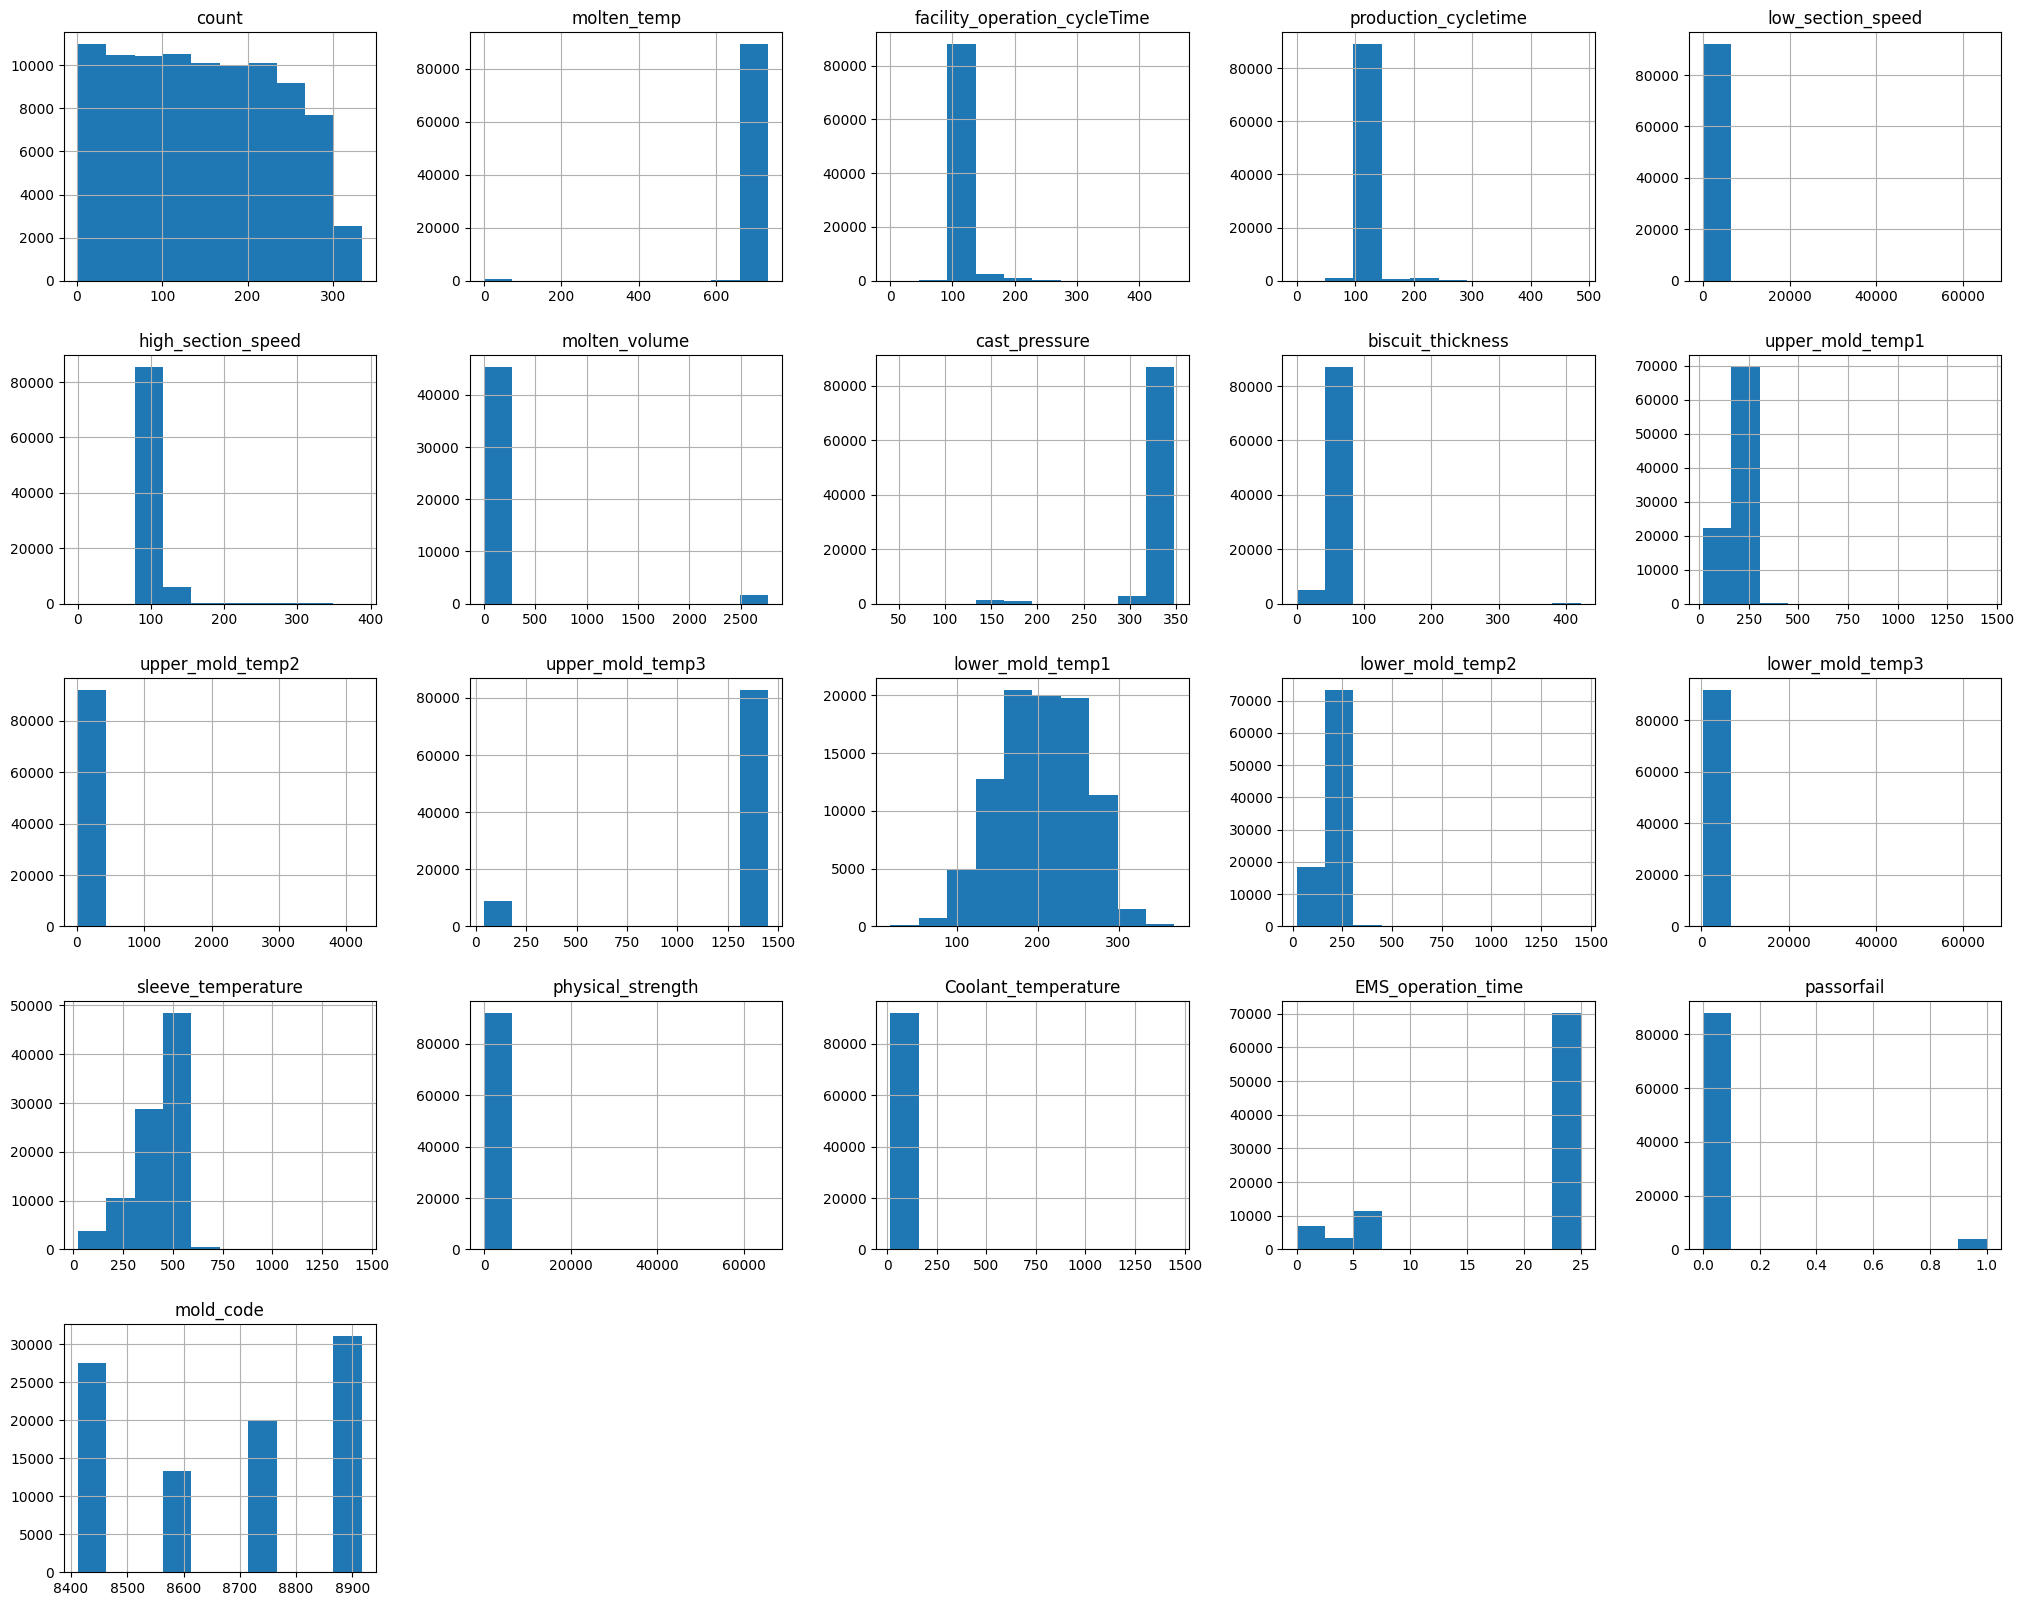

In [ ]:
data.hist(figsize=(25,20))
plt.show()

In [ ]:
pass_count = len(data[data['passorfail']== 0])
fail_count = len(data[data['passorfail']== 1])
                 
print('양품 개수 : ', pass_count)
print('불량 개수 : ', fail_count)
print('불량률 :', fail_count/(fail_count+pass_count)*100)

양품 개수 :  87998
불량 개수 :  4016
불량률 : 4.364553220162149


In [ ]:
use_col = data.dtypes[data.dtypes!='object'].index
data = data[use_col]
data

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,198.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,268.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,276.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,83.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,83.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,79.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,82.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [ ]:
data_copy = data.copy()
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,198.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,268.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,276.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,83.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,83.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,79.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,82.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [ ]:
data_copy.columns

Index(['count', 'molten_temp', 'facility_operation_cycleTime',
       'production_cycletime', 'low_section_speed', 'high_section_speed',
       'molten_volume', 'cast_pressure', 'biscuit_thickness',
       'upper_mold_temp1', 'upper_mold_temp2', 'upper_mold_temp3',
       'lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3',
       'sleeve_temperature', 'physical_strength', 'Coolant_temperature',
       'EMS_operation_time', 'passorfail', 'mold_code'],
      dtype='object')

In [ ]:
data_copy.shape

(92015, 21)

In [ ]:
data_copy.isnull().sum()

count                               0
molten_temp                      2261
facility_operation_cycleTime        0
production_cycletime                0
low_section_speed                   1
high_section_speed                  1
molten_volume                   45130
cast_pressure                       1
biscuit_thickness                   1
upper_mold_temp1                    1
upper_mold_temp2                    1
upper_mold_temp3                  313
lower_mold_temp1                    1
lower_mold_temp2                    1
lower_mold_temp3                  313
sleeve_temperature                  1
physical_strength                   1
Coolant_temperature                 1
EMS_operation_time                  0
passorfail                          1
mold_code                           0
dtype: int64

In [ ]:
data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
count,92015.0,148.510895,87.969953,1.0,72.0,146.0,222.0,334.0
molten_temp,89754.0,718.618513,51.728659,0.0,713.0,728.0,730.0,735.0
facility_operation_cycleTime,92015.0,121.555007,12.116145,0.0,117.0,119.0,122.0,457.0
production_cycletime,92015.0,122.514525,13.595314,0.0,119.0,121.0,123.0,485.0
low_section_speed,92014.0,110.794999,305.181962,0.0,110.0,110.0,110.0,65535.0
high_section_speed,92014.0,112.624959,10.759272,0.0,112.0,112.0,112.0,388.0
molten_volume,46885.0,154.976624,485.640901,0.0,49.0,67.0,85.0,2767.0
cast_pressure,92014.0,324.554535,27.327683,41.0,329.0,330.0,331.0,348.0
biscuit_thickness,92014.0,50.666486,17.925620,0.0,47.0,50.0,53.0,422.0
upper_mold_temp1,92014.0,186.208870,46.041322,18.0,163.0,194.0,222.0,1449.0


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92015 entries, 0 to 92014
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   count                         92015 non-null  int64  
 1   molten_temp                   89754 non-null  float64
 2   facility_operation_cycleTime  92015 non-null  int64  
 3   production_cycletime          92015 non-null  int64  
 4   low_section_speed             92014 non-null  float64
 5   high_section_speed            92014 non-null  float64
 6   molten_volume                 46885 non-null  float64
 7   cast_pressure                 92014 non-null  float64
 8   biscuit_thickness             92014 non-null  float64
 9   upper_mold_temp1              92014 non-null  float64
 10  upper_mold_temp2              92014 non-null  float64
 11  upper_mold_temp3              91702 non-null  float64
 12  lower_mold_temp1              92014 non-null  float64
 13  lower_

In [ ]:
data_copy.drop('molten_volume', axis=1, inplace=True)
data_copy.dropna(axis=0, inplace=True)
data_copy.reset_index(drop=True, inplace=True)
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,331.0,35.0,198.0,116.0,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,73,731.0,119,120,109.0,125.0,177.0,48.0,24.0,33.0,1449.0,30.0,273.0,1449.0,479.0,708.0,35.0,23,1.0,8722
2,1,731.0,119,123,109.0,112.0,176.0,49.0,26.0,55.0,1449.0,30.0,323.0,1449.0,513.0,700.0,35.0,23,1.0,8722
3,2,731.0,119,124,109.0,112.0,331.0,47.0,31.0,65.0,1449.0,30.0,343.0,1449.0,531.0,708.0,34.0,23,1.0,8722
4,3,731.0,120,124,110.0,112.0,331.0,46.0,36.0,73.0,1449.0,31.0,343.0,1449.0,544.0,707.0,34.0,23,1.0,8722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89436,71,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
89437,72,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
89438,73,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
89439,74,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [ ]:
for col in data_copy.dtypes[data_copy.dtypes!='object'].index:
    UCL = np.percentile(data_copy[col], 99.9)
    LCL = np.percentile(data_copy[col], 0.1)
    data_copy = data_copy[(data_copy[col] <= UCL) & (data_copy[col] >= LCL)]
data_copy.reset_index(drop=True, inplace=True)
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,32,729.0,127,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0,8722
1,2,729.0,126,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0,8573
2,3,730.0,126,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0,8573
3,4,731.0,126,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,23,1.0,8573
4,5,731.0,126,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,23,1.0,8573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,71,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
87255,72,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
87256,73,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
87257,74,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [ ]:
t_test = []
for i, col in enumerate(data_copy.columns):
    t=scipy.stats.ttest_ind(data_copy[data_copy['passorfail']==1][col], data_copy[data_copy['passorfail']==0][col], equal_var=False)
    t_test.append([col, t[0], t[1]])
df_ttest = pd.DataFrame(t_test, columns=['col', 'tvalue', 'pvalue'])
use_t_list = []
for i in range(len(df_ttest)):
    if df_ttest['pvalue'][i] < 0.1:
        use_t_list.append(df_ttest['col'][i])
df_ttest

,col,tvalue,pvalue
0,count,-45.044308,0.000000e+00
1,molten_temp,3.786891,1.552251e-04
2,facility_operation_cycleTime,0.830063,4.065656e-01
3,production_cycletime,-16.718089,3.974998e-60
4,low_section_speed,-17.048564,2.804018e-62
5,high_section_speed,7.086440,1.706243e-12
6,cast_pressure,-63.993068,0.000000e+00
7,biscuit_thickness,3.641038,2.761401e-04
8,upper_mold_temp1,-48.991533,0.000000e+00
9,upper_mold_temp2,-51.139842,0.000000e+00


In [ ]:
data_copy = data_copy[use_t_list]
data_copy

,count,molten_temp,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,32,729.0,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0,8722
1,2,729.0,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0,8573
2,3,730.0,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0,8573
3,4,731.0,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,23,1.0,8573
4,5,731.0,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,23,1.0,8573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,71,731.0,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
87255,72,731.0,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
87256,73,732.0,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
87257,74,732.0,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [ ]:
data_copy.drop(['count', 'EMS_operation_time', 'mold_code'], axis=1, inplace=True)
data_copy

,molten_temp,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,passorfail
0,729.0,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,0.0
1,729.0,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,1.0
2,730.0,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,1.0
3,731.0,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,1.0
4,731.0,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,731.0,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0.0
87255,731.0,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0.0
87256,732.0,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0.0
87257,732.0,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0.0


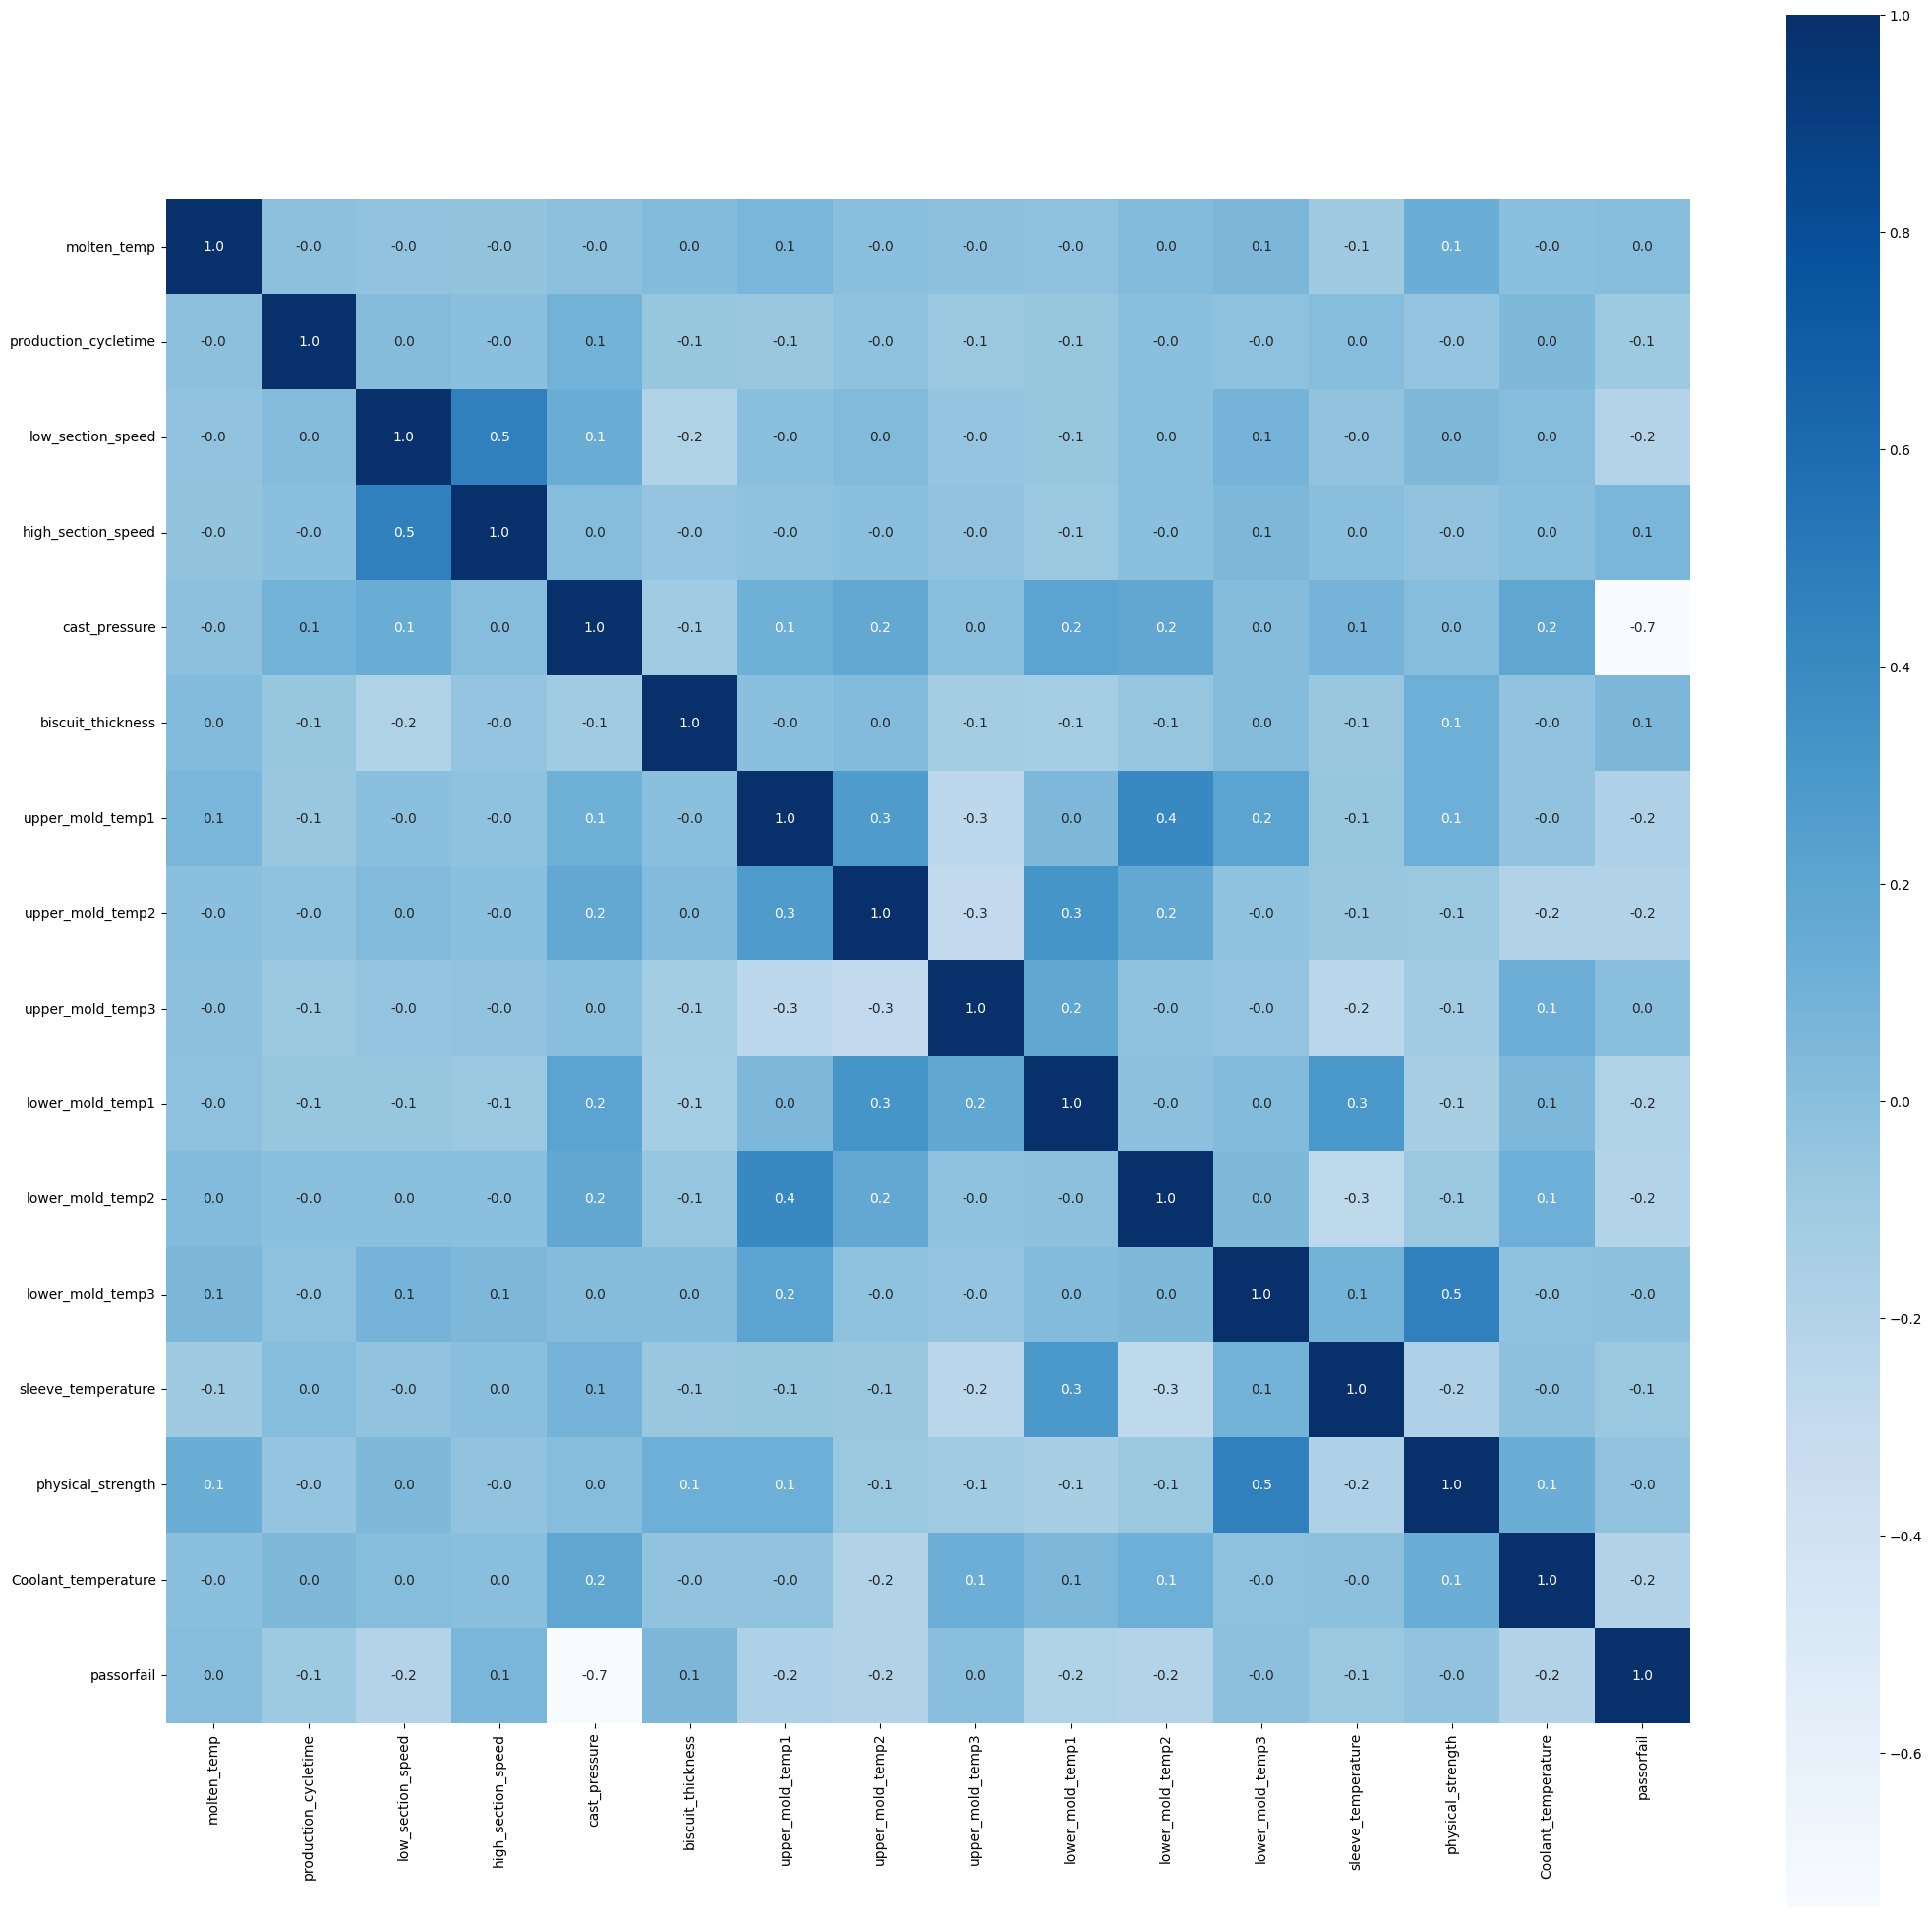

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(data_copy.corr(), annot = True, fmt = '.1f', square = True, cmap = 'Blues')
plt.show()

In [ ]:
X = data_copy.drop('passorfail', axis=1).values
y = data_copy['passorfail'].values

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
dt_clf =  DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, eval_metric='error', use_label_encoder=False)
lgbm_clf = LGBMClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_fold_f1 = []
n_iter = 0
print('모델 :', dt_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    dt_clf.fit(X_train_scaled, y_train)
    valid_pred = dt_clf.predict(X_valid_scaled)
    test_pred = dt_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    dt_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    dt_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {dt_fold_f1[0][0]} {dt_fold_f1[0][1]}')

모델 : DecisionTreeClassifier(random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8293487221764221
교차검증 중 가장 높은 정확도  : Split 1 0.8293487221764221
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.8344594594594594
교차검증 중 가장 높은 정확도  : Split 2 0.8344594594594594
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.834162520729685
교차검증 중 가장 높은 정확도  : Split 2 0.8344594594594594
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.835421888053467
교차검증 중 가장 높은 정확도  : Split 4 0.835421888053467
StratifiedShuffleSplit 5 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 5 테스트 데이터 f1 정확도 : 0.8287841191066997
교차검증 중 가장 높은 정확도  : Split 4 0.835421888053467


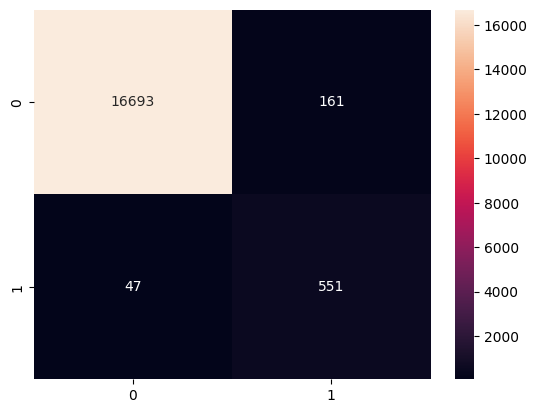

In [ ]:
dt_clf.fit(X[idx_list[dt_fold_f1[0][0]-1][0]], y[idx_list[dt_fold_f1[0][0]-1][0]])
pred = dt_clf.predict(X[idx_list[dt_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[dt_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_fold_f1 = []
n_iter = 0
print('모델 :', rf_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    rf_clf.fit(X_train_scaled, y_train)
    valid_pred = rf_clf.predict(X_valid_scaled)
    test_pred = rf_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    rf_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    dt_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {rf_fold_f1[0][0]} {rf_fold_f1[0][1]}')

모델 : RandomForestClassifier(random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8823529411764706
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.8699551569506726
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.8620378719567178
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.8738738738738739
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 5 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 5 테스트 데이터 f1 정확도 : 0.8752260397830018
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706


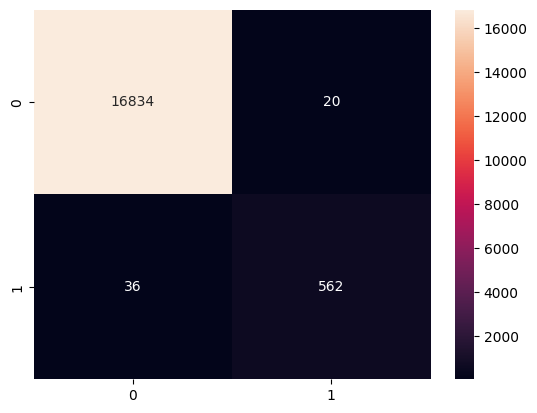

In [ ]:
rf_clf.fit(X[idx_list[rf_fold_f1[0][0]-1][0]], y[idx_list[rf_fold_f1[0][0]-1][0]])
pred = rf_clf.predict(X[idx_list[rf_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[rf_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [ ]:
xgb_clf = RandomForestClassifier(random_state=42)
xgb_fold_f1 = []
n_iter = 0
print('모델 :', xgb_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    xgb_clf.fit(X_train_scaled, y_train)
    valid_pred = xgb_clf.predict(X_valid_scaled)
    test_pred = xgb_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    xgb_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    xgb_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {xgb_fold_f1[0][0]} {xgb_fold_f1[0][1]}')

모델 : RandomForestClassifier(random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8823529411764706
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.8699551569506726
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.8620378719567178
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.8738738738738739
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 5 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 5 테스트 데이터 f1 정확도 : 0.8752260397830018
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706


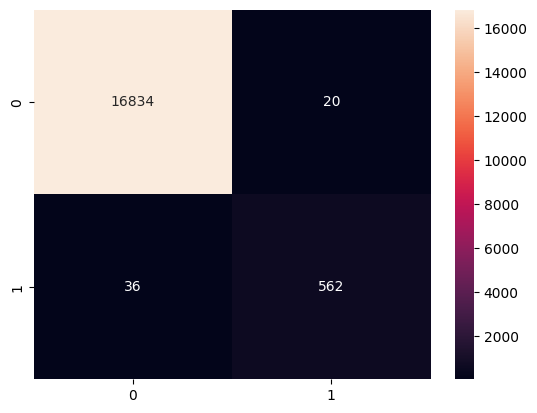

In [ ]:
xgb_clf.fit(X[idx_list[xgb_fold_f1[0][0]-1][0]], y[idx_list[xgb_fold_f1[0][0]-1][0]])
pred = xgb_clf.predict(X[idx_list[xgb_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[xgb_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [ ]:
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_fold_f1 = []
n_iter = 0
print('모델 :', lgbm_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    lgbm_clf.fit(X_train_scaled, y_train)
    valid_pred = lgbm_clf.predict(X_valid_scaled)
    test_pred = lgbm_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    lgbm_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    lgbm_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {lgbm_fold_f1[0][0]} {lgbm_fold_f1[0][1]}')

모델 : LGBMClassifier(random_state=42)
[LightGBM] [Info] Number of positive: 2394, number of negative: 67413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 69807, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034295 -> initscore=-3.337872
[LightGBM] [Info] Start training from score -3.337872
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9548387096774195
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8952879581151832
교차검증 중 가장 높은 정확도  : Split 1 0.8952879581151832
[LightGBM] [Info] Number of positive: 2394, number of negative: 67413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Light

[LightGBM] [Info] Number of positive: 1941, number of negative: 53904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 55845, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034757 -> initscore=-3.324001
[LightGBM] [Info] Start training from score -3.324001


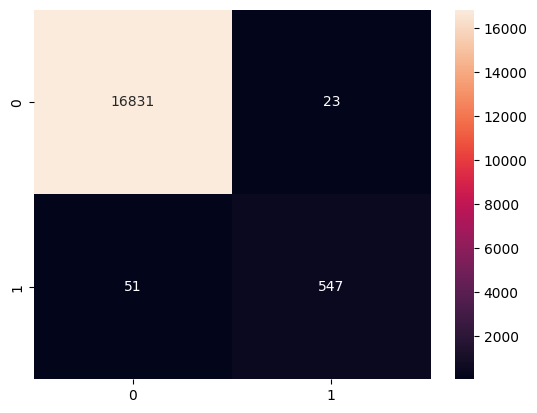

In [ ]:
lgbm_clf.fit(X[idx_list[lgbm_fold_f1[0][0]-1][0]], y[idx_list[lgbm_fold_f1[0][0]-1][0]])
pred = lgbm_clf.predict(X[idx_list[lgbm_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[lgbm_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [ ]:
ada_clf = LGBMClassifier(random_state=42)
ada_fold_f1 = []
n_iter = 0
print('모델 :', lgbm_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    ada_clf.fit(X_train_scaled, y_train)
    valid_pred = ada_clf.predict(X_valid_scaled)
    test_pred = ada_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    ada_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    lgbm_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {ada_fold_f1[0][0]} {ada_fold_f1[0][1]}')

모델 : LGBMClassifier(random_state=42)
[LightGBM] [Info] Number of positive: 2394, number of negative: 67413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 69807, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034295 -> initscore=-3.337872
[LightGBM] [Info] Start training from score -3.337872
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9548387096774195
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8952879581151832
교차검증 중 가장 높은 정확도  : Split 1 0.8952879581151832
[LightGBM] [Info] Number of positive: 2394, number of negative: 67413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2060
[LightGBM] [Info] Number of data poi

[LightGBM] [Info] Number of positive: 1941, number of negative: 53904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 55845, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034757 -> initscore=-3.324001
[LightGBM] [Info] Start training from score -3.324001


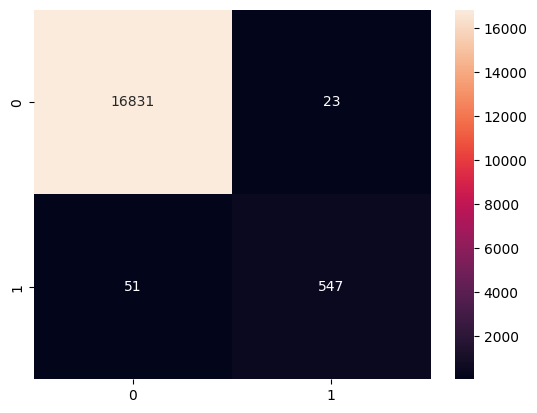

In [ ]:
ada_clf.fit(X[idx_list[ada_fold_f1[0][0]-1][0]], y[idx_list[ada_fold_f1[0][0]-1][0]])
pred = ada_clf.predict(X[idx_list[ada_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[ada_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

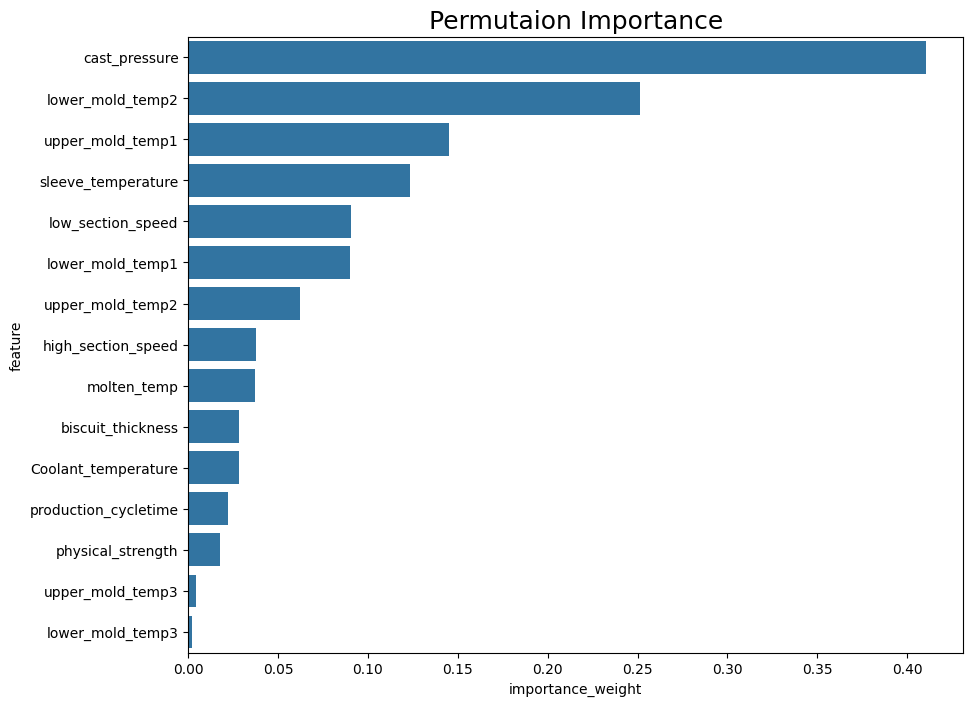

In [ ]:
pi = PermutationImportance(lgbm_clf, scoring='f1', n_iter=30)
pi.fit(X[idx_list[lgbm_fold_f1[0][0]-1][0]], y[idx_list[lgbm_fold_f1[0][0]-1][0]])
permu_df = pd.DataFrame()
permu_df["feature"] = data_copy.columns[:-1]
permu_df["importance_weight"] = pi.feature_importances_
permu_df.sort_values(by='importance_weight', ascending=False, inplace=True)
permu_df.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance_weight', y='feature', data=permu_df)
plt.title('Permutaion Importance', fontsize=18)
plt.show()

[LightGBM] [Info] Number of positive: 1941, number of negative: 53904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 55845, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034757 -> initscore=-3.324001
[LightGBM] [Info] Start training from score -3.324001


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

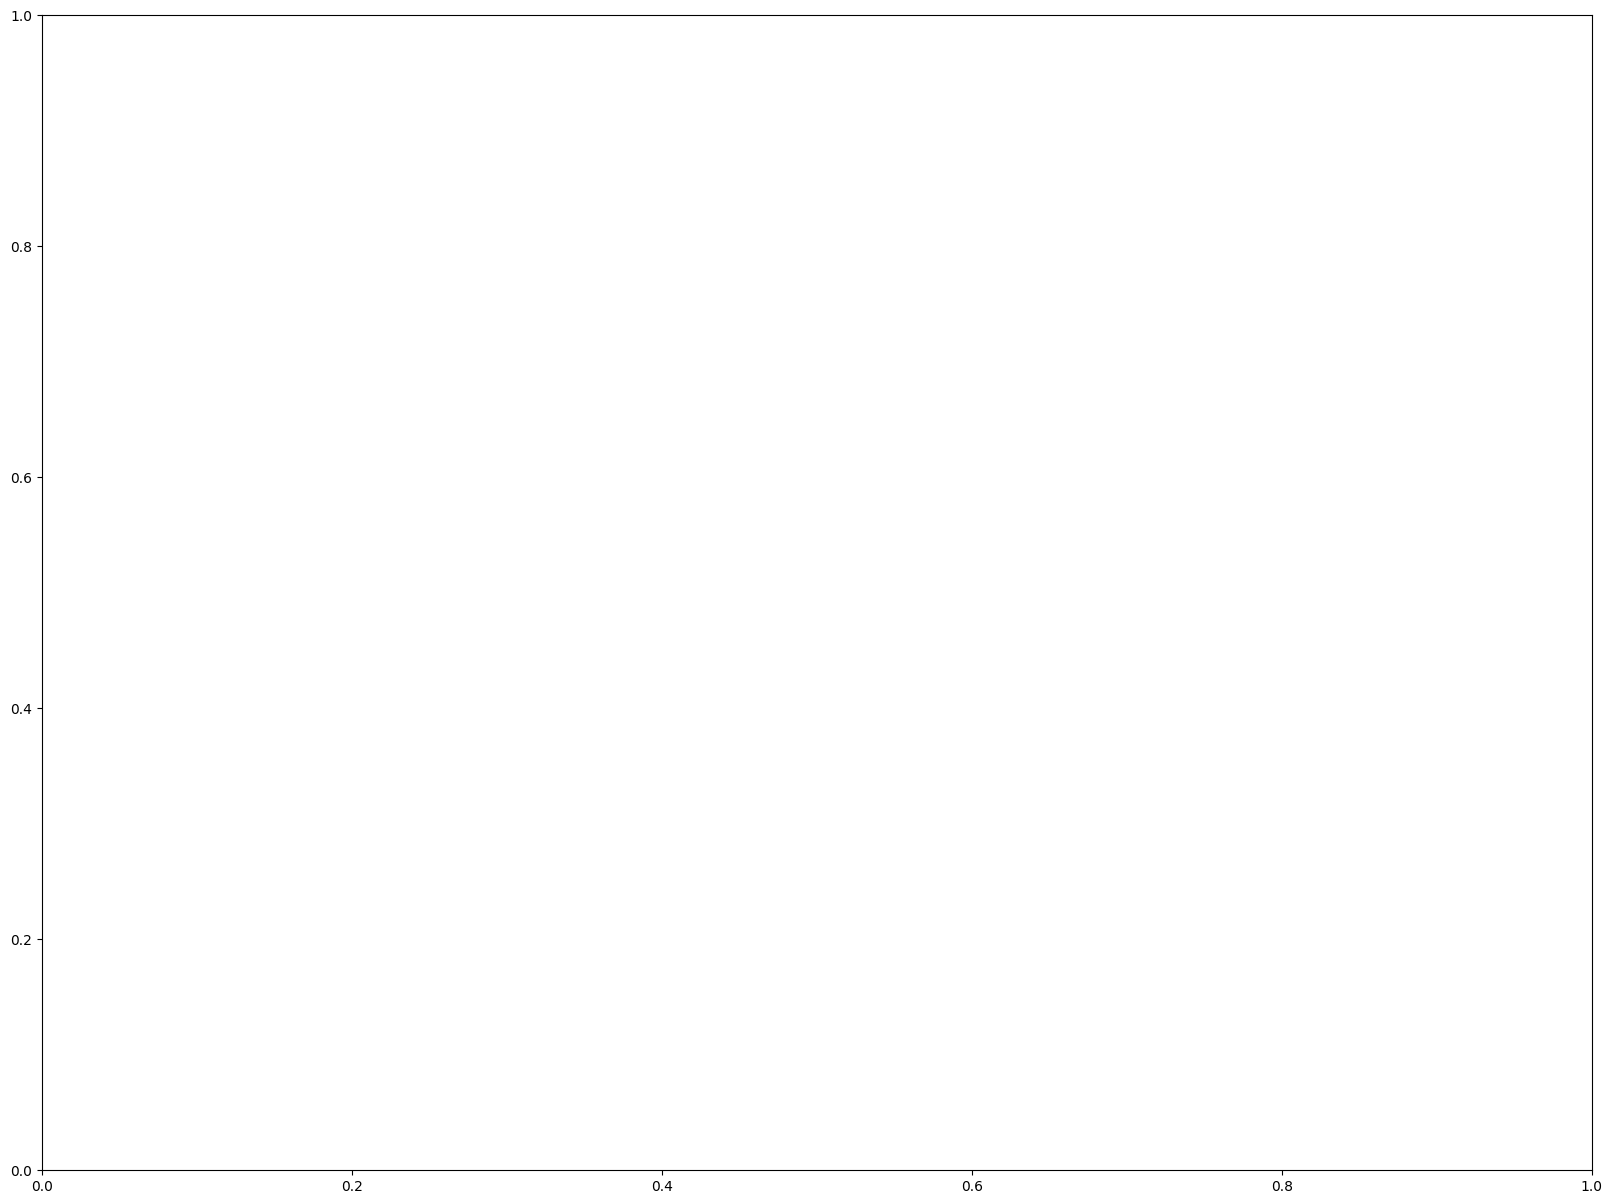

In [ ]:
lgbm = LGBMClassifier(random_state=42)
tmp = pd.DataFrame(X[idx_list[lgbm_fold_f1[0][0]-1][0]], columns=data_copy.columns[:-1])
lgbm.fit(tmp, y[idx_list[lgbm_fold_f1[0][0]-1][0]])
lightgbm.plot_tree(lgbm,dpi=100,orientation='vertical',figsize=(20,15), show_info=['internal_value', 'internal_count'])

## 완전성, 유일성, 유효성, 일관성, 정확성, 무결성

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1 = data
use_col = data1.dtypes[data1.dtypes!='object'].index
data_copy = data1[use_col]
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,198.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,268.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,276.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,83.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,83.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,79.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,82.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [ ]:
ratio = 30
total_li = []
remove_list = []
for column in data_copy.columns:
    tmp = data_copy[column]
    print('column name :', column)
    print('[step 1] 변수별 결측 비율')
    print(round(tmp.isnull().sum()/len(tmp)*100,2))
    print('[step 2] 변수별 결측 비율 30% 초과 여부')
    print(tmp.isnull().sum()/len(tmp)*100>ratio)
    if tmp.isnull().sum()/len(tmp)*100>ratio:
        remove_list.append(column)
    print('[step 3] 전체 데이터셋 결측치 개수')
    cmpt_len = tmp.isnull().sum().sum()
    print(cmpt_len)
    print(f"결측치 = {cmpt_len}개")
    print(f"완전성 지수 : {(1-cmpt_len/len(data_copy))*100}")
    print('='*30)
    total_li.append((1-cmpt_len/len(data_copy))*100)
    
print('전체 칼럼의 완전성 지수 :', np.mean(total_li))
print('30% 초과 변수 :', remove_list)
data_copy.drop(remove_list, axis=1, inplace=True)

##for 반복문을 돌려 각 변수별로 결측비율과 30% 초과여부, 결측 개수 등을 확인한다.
##②  각 변수별 완전성 지수를 total_li라는 리스트에 담은 후 넘파이 mean()함수를 통해 전체 
##변수의 완전성 지수를 계산한다.
##③ 결측 비율이 30%를 초과하는 변수는 remove_list라는 리스트에 담은 후 출력한다.
##④  결측 비율이 30%를 초과하는 데이터들은 데이터의 완전성이 떨어지기 때문에 삭제해야하
##며, 이 데이터에서는 molten_volume 변수가 30%를 초과하므로 삭제한다.

column name : count
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
0
결측치 = 0개
완전성 지수 : 100.0
column name : molten_temp
[step 1] 변수별 결측 비율
2.46
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
2261
결측치 = 2261개
완전성 지수 : 97.54279193609737
column name : facility_operation_cycleTime
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
0
결측치 = 0개
완전성 지수 : 100.0
column name : production_cycletime
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
0
결측치 = 0개
완전성 지수 : 100.0
column name : low_section_speed
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
1
결측치 = 1개
완전성 지수 : 99.99891322067054
column name : high_section_speed
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
1
결측치 = 1개
완전성 지수 : 99.99891322067054
column name : cast_pressure
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
1
결측치 = 1개

In [ ]:
check_unique = data_copy.value_counts().reset_index()
perc_check_unique=round((len(check_unique)-len(check_unique[check_unique[0]>1]))/len(check_unique)*100,2)
print(f"유일성 지수 : {perc_check_unique}")

유일성 지수 : 99.97


In [ ]:
molten_temp_range = [0, 750]
facility_operation_cycleTime_range = [0, 500]
production_cycletime_range = [0, 500]
low_section_speed_range = [0, 200]
high_section_speed_range = [0, 400]
cast_pressure_range = [0, 400]
biscuit_thickness_range = [0,450]
upper_mold_temp1_range = [0, 1500]
upper_mold_temp2_range = [0, 1500]
upper_mold_temp3_range = [0, 1500]
lower_mold_temp1_range = [0, 400]
lower_mold_temp2_range = [0, 500]
lower_mold_temp3_range = [0, 1500]
sleeve_temperature_range = [0, 500]
physical_strength_range = [0, 800]
Coolant_temperature_range = [0, 50]
EMS_operation_time_range = [0, 25]
passorfail_range = [0, 1]
ranges = [molten_temp_range,facility_operation_cycleTime_range,production_cycletime_range,
low_section_speed_range,high_section_speed_range,cast_pressure_range, 
biscuit_thickness_range,upper_mold_temp1_range,upper_mold_temp2_range, upper_mold_temp3_range,lower_mold_temp1_range,
lower_mold_temp2_range,lower_mold_temp3_range,sleeve_temperature_range,
physical_strength_range,Coolant_temperature_range,EMS_operation_time_range,passorfail_range]

In [ ]:
total_in = 0
ratio = []
for col, value in zip(data_copy.columns[1:-1], ranges):
    column_in = 0
    
    for i in range(len(data_copy)):
        if value[0] <= data_copy[col][i] <= value[1] :
            column_in += 1
            
    ratio.append(column_in/len(data_copy)*100)
print(f'유효성 지수 : {np.round(np.mean(ratio),2)}')

유효성 지수 : 98.95


In [ ]:
numeric = 0
non_numeric = 0
for col in data_copy.columns:
    if (data_copy[col].dtypes == 'int64') | (data_copy[col].dtypes == 'float64'):
        numeric += 1
    else:
        non_numeric += 1
        
print(f'일관성 지수 : {(numeric/numeric+non_numeric)*100}')

일관성 지수 : 100.0
